In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Standard Scaler usado para normalizar os dados
from sklearn.model_selection import train_test_split
from sklearn import svm # Support Vector Machine usado para classificação
from sklearn.metrics import accuracy_score # Accuracy Score usado para medir a acurácia do modelo
from sklearn.metrics import r2_score

#plt.switch_backend('TkAgg')  # Ou 'Qt5Agg'   ; CRIA UMA JANELA DE FIGURA
%matplotlib inline

In [2]:
baseChuva = pd.read_csv('Rainfall.csv')

#mostrar as 20 primeiras linhas da base de dados
baseChuva.head(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [3]:
#mostrar o tamanho da base
print(baseChuva.shape)

(366, 12)


In [4]:
#verifricar se existem valores nulos
baseChuva.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [5]:
#remover valores nulos
baseChuva = baseChuva.dropna()

In [6]:
#verificar quantos valores na coluna rainfall são yes ou no, ou seja, se choveu ou não
print(baseChuva['rainfall'].value_counts())

rainfall
yes    248
no     117
Name: count, dtype: int64


In [7]:
#tranformar os valores yes e no em 1 e 0, 1 para yes e 0 para no
baseChuva['rainfall'] = baseChuva['rainfall'].map({'yes': 1, 'no': 0})

In [8]:
#verificar quantos valores na coluna rainfall são 1 ou 0, ou seja, se choveu ou não
print(baseChuva['rainfall'].value_counts())

rainfall
1    248
0    117
Name: count, dtype: int64


In [9]:
#retirar a coluna day, pois ela não é relevante para a análise
baseChuva = baseChuva.drop('day', axis = 1)

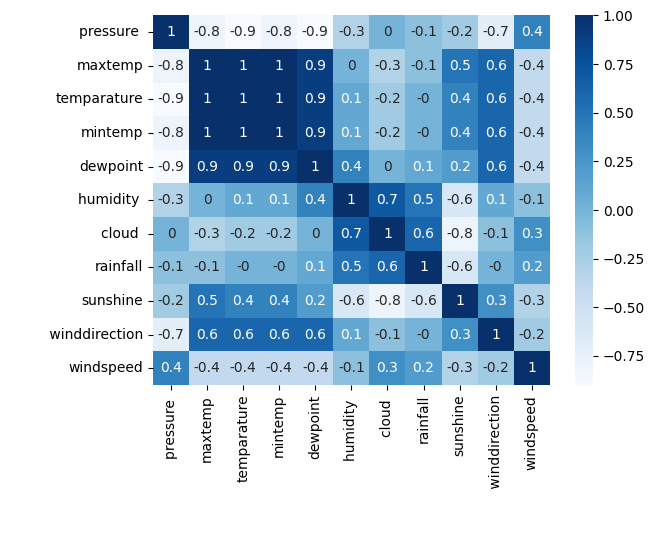

In [10]:
#mostrar a correlação entre as variáveis do dataframe
sns.heatmap(baseChuva.corr().round(1), annot=True, cmap='Blues')
plt.show()

In [11]:
#agora separar o dataframe em variáveis independentes e dependentes
X = baseChuva.drop('rainfall', axis = 1)
Y = baseChuva['rainfall']

In [12]:
#agora padronizar os dados para que todos tenham a mesma escala, pois a diferença de escala pode afetar o desempenho do modelo
scaler = StandardScaler()
scaler.fit(X) # calcula a média e o desvio padrão para serem usados na padronização dos dados de entrada X 

StandardScaler()

In [13]:
dadosPadronizados = scaler.transform(X) # padroniza os dados de entrada X, usado para normalizar os dados de entrada 
print(dadosPadronizados) # mostrando os dados padronizados entre -1 e 1

[[ 1.89587755 -1.05104331 -0.96572348 ...  1.24242127 -0.26352655
   0.47365326]
 [ 1.28658923 -0.74960475 -0.85911322 ... -0.96969465 -0.63112092
  -0.62023103]
 [ 0.92726534 -0.98405697 -0.78803971 ... -1.12225437 -0.75365237
  -0.72961946]
 ...
 [ 1.89587755 -1.21850918 -1.07233375 ...  0.04737014 -0.38605801
   1.17970585]
 [ 1.80214088 -1.16826942 -1.14340726 ... -0.81713493 -0.99871528
  -0.06334448]
 [ 1.97399143 -0.95056379 -1.05456537 ...  0.32706296 -0.99871528
   0.17532118]]


In [14]:
X = dadosPadronizados # agora os dados de entrada estão padronizados e prontos para serem usados no modelo
Y = baseChuva['rainfall'] # os dados de saída continuam os mesmos 

In [15]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, stratify = Y ,random_state=2)
#X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_treino.shape, X_teste.shape)

(365, 10) (292, 10) (73, 10)


In [17]:
#treinar o modelo usando o SVM(Support Vector Machine) pois nesse caso é um problema de classificação(0 ou 1) e o SVM é um bom algoritmo para classificação
#criar o modelo
modelo = svm.SVC(kernel='linear')

In [18]:
#treinando o modelo
modelo.fit(X_treino, Y_treino)

SVC(kernel='linear')

In [19]:
#verificar a precisao do score do modelo nos dados de teste
X_treino_pred = modelo.predict(X_treino) # predizendo os dados de treino para verificar a acurácia do modelo 
treino_acuracia = accuracy_score(X_treino_pred, Y_treino) # calculando a acurácia do modelo

print('Acurácia do modelo nos dados de treino:', treino_acuracia*100, '% de presisão',)

Acurácia do modelo nos dados de treino: 80.13698630136986 % de presisão


In [20]:
#verificar a precisao do score do modelo nos dados de treino
X_teste_pred = modelo.predict(X_teste) # predizendo os dados de teste para verificar a acurácia do modelo
teste_acuracia = accuracy_score(X_teste_pred, Y_teste) # calculando a acurácia do modelo

print('Acurácia do modelo nos dados de teste:', teste_acuracia*100, '% de presisão',)

Acurácia do modelo nos dados de teste: 83.56164383561644 % de presisão


In [ ]:
# Automatizando o processo de previsão para todo o dataframe
resultados = []

for index, row in baseChuva.iterrows():
    entrada = row.drop('rainfall').values  # Pegando todas as colunas exceto 'Outcome'
    entrada_array = np.asarray(entrada)  # Transformando a entrada em um array numpy
    entrada_reshaped = entrada_array.reshape(1, -1)  # Redimensionando o array
    entrada_padronizada = scaler.transform(entrada_reshaped)  # Padronizando os dados de entrada
    previsao = modelo.predict(entrada_padronizada)  # Fazendo a previsão
    resultados.append((previsao[0], row['rainfall']))  # Armazenando a previsão e o valor verdadeiro

# Convertendo os resultados para um DataFrame para facilitar a visualização
resultados_df = pd.DataFrame(resultados, columns=['Previsao', 'Valor Verdadeiro'])

# Filtrando para mostrar apenas as previsões que não estão de acordo com o resultado real
resultados_incorretos = resultados_df[resultados_df['Previsao'] != resultados_df['Valor Verdadeiro']]


In [77]:
resultados_df

,Previsao,Valor Verdadeiro
0,0,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
360,1,1.0
361,1,1.0
362,1,1.0
363,1,1.0


In [26]:
resultados_incorretos

,Previsao,Valor Verdadeiro
0,0,1.0
5,0,1.0
8,1,0.0
11,1,0.0
18,1,0.0
...,...,...
344,1,0.0
345,1,0.0
348,0,1.0
359,1,0.0


In [76]:
def prever_chuva(pressure, maxtemp, temparature, mintemp, dewpoint, humidity, cloud, sunshine, winddirection, windspeed):

    entrada = np.array([[pressure, maxtemp, temparature, mintemp, dewpoint,  humidity, cloud, sunshine, winddirection, windspeed]])
    entrada_padronizada = scaler.transform(entrada)
    previsao = modelo.predict(entrada_padronizada)
    if previsao[0] == 1:
        print("Choverá.")
    else:
        print("Não vai chover.")

prever_chuva(1017.5, 18.5, 18.0, 17.2, 15.5, 85, 91, 0.0, 70.0, 37.7)

#1017.5, 18.5, 18.0, 17.2, 15.5, 85, 91, 0.0, 70.0, 37.7 = chuva
#1021.8, 21.4, 18.8, 17.0, 15.0, 79, 56, 3.4, 30.0, 21.5 = sem chuva

Choverá.


C:\Users\Yago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
